<p style="text-align:center; font-size:300%; line-height:300%; font-weight:bold; background-color:#2F52A3; color:white">Projet Algorithmique</p>
<p style="text-align:center; font-size:150%; line-height:300%; font-weight:bold; color:black">Licence 3 Informatique - Romain SIMON</p>

**Importations**

In [245]:
import networkx as nx
import matplotlib.pyplot as mp
import numpy as np
import time

**Jeu d'essai**

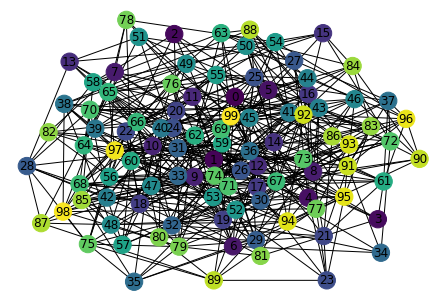

In [275]:
G = nx.gnm_random_graph(100,500)
color_map = [x/len(G.nodes()) for x in range(len(G.nodes()))]
nx.draw(G, node_color=color_map,with_labels=True)
mp.show()

**Centralité Degré**

Temps d'execution (en s): 0.00102996826171875
[7, 8, 6, 5, 6, 8, 12, 8, 10, 17, 12, 8, 17, 7, 12, 7, 10, 10, 10, 13, 12, 9, 13, 7, 7, 13, 12, 7, 9, 7, 12, 15, 10, 11, 5, 7, 18, 8, 9, 8, 13, 13, 12, 11, 8, 14, 9, 12, 9, 10, 11, 6, 11, 14, 7, 9, 11, 7, 8, 13, 11, 10, 10, 9, 8, 11, 13, 11, 11, 15, 9, 11, 10, 10, 15, 10, 10, 10, 6, 13, 9, 8, 6, 10, 8, 10, 10, 6, 8, 8, 7, 11, 13, 9, 9, 11, 10, 12, 9, 13]


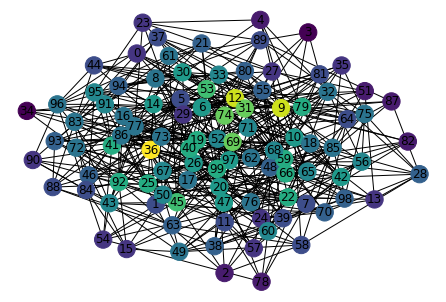

In [276]:
def centraliteDegre(G):
    degre = [] #on crée un tableau qui contiendra la valeur des degrés de chaque sommet
    for i in G: #on se positionne sur chaque sommet du graphe
        sommet = dict(nx.bfs_successors(G, i,depth_limit=1)) #on récupère la liste des voisins de ce sommet
        degre.append(len(sommet[i])) #on ajoute à degré la taille de la liste, donc son nombre de voisins
    return degre

t = time.time()
degre = centraliteDegre(G)
print("Temps d'execution (en s): ", end='')
print(time.time()-t)
print(degre)
nx.draw(G, node_color=degre,with_labels=True) #on affiche la graphe avec comme couleur les degrés qu'on vient de calculer

Cet algorithme permet de calculer le degré de chaque sommet du graphe, puis d'afficher ce graphe avec comme couleurs la centralité degré.
La complexité de cette algorithme est O(n) avec n le nombre de sommets car c'est la complexité de la boucle for, et ajouter un élément à une liste à une complexité de O(1) donc la complexité totale est **O(n)**.

**Centralité Closeness**

Algorithme de calcul du plus court chemin :
Comme dans notre graphe nos arêtes n'ont pas de poids, pour calculer le plus court chemin il faut juste compter le nombre d'arêtes qui sépare deux sommets. Il suffit donc de faire un parcours en largeur car il calculera la distance de chaque sommet depuis la source.

In [277]:
def calculDistances(G, s):
    file = [] # on crée la file d'attente
    file.append(s) # on ajoute le sommet d'origine à la file d'attente
    visites = [] # on initialise la liste des sommets qui ont été visités
    visites.append(s) # on ajoute le sommet d'origine
    i = 0 # i servira à compter le nombre d'arêtes entre l'origine et un sommet donné
    distances = [[s,i]] # on initialise les distances, avec comme première distance le sommet d'origine vers lui même qui a donc une distance de 0
    while len(file) > 0: 
        u = file.pop(0) # on récupère le 1er sommet de la file
        for v in G.neighbors(u): # on parcourt les voisins de ce sommet
            if v not in visites: # si le voisin actuel n'a pas été visité
                visites.append(v) # on l'ajoute au sommet visité
                file.append(v) # on l'ajoute à la file d'attente
                i = distances[visites.index(u)][1] + 1 # on calcule sa distance par rapport à la distance du 1er sommet de la file, donc on ajoute 1 car c'est son voisin
                distances.append([v,i]) # on enregistre la distance pour le sommet voisin
    return distances

J'ai implémenté le pseudo-code vu en cours de l'algorithme du parcours en largeur. J'ai juste ajouté en plus la notion de distance, qui permet de compter le nombre d'arêtes entre le sommet d'origine et tous les autres sommets. La fonction renvoie un tableau qui donne pour chaque sommet sa distance avec le sommet d'origine. 
La complexité de la fonction est **O(n+m)**, comme vu en cours, avec n le nombre de sommets et m le nombre d'arêtes.

In [278]:
def centraliteCloseness(G):
    moyennes = [] # initialise une liste qui contiendra les moyennes des distances pour chaque sommet
    degre = centraliteDegre(G) # pour gérer si les graphes ne sont pas connexes
    for i in G: # on se positionne sur chaque sommet du graphe
        if degre[i] == 0: # si le graphe n'a pas de voisins
            moyennes.append(0) # il n'y a pas de chemin le plus court du coup sa moyenne sera 0
        else:
            somme = 0 # initialise la somme totale des distances
            distances = calculDistances(G,i) # on récupère les distances depuis le sommet i vers tous les autres sommets
            for y in distances: # on parcourt les distances récupérées
                somme += y[1] # on additionne la somme de toutes les distances
            moyennes.append((len(distances)-1)/somme) # on ajoute au tableau des moyennes l'inverse de la moyenne des distances entre tous les sommets
    return moyennes

Pour la complexité, le 1er **for** va avoir une complexité de O(n) avec n le nombre de sommets du graphe, le 2ème **for** aura aussi une complexité de O(n) et il y aura n itérations en tout. Ce qui nous donne pour l'instant une complexité de O(n+n) ou O(2n). Cependant, on appelle aussi la fonction **calculDistances**, qui comme on l'a vu plus tôt à une complexité de O(n+m). Il faut la multiplier à notre complexité précédente, on a donc une complexité totale de : **O(n² + m)**

Temps d'execution (en s): 0.07300662994384766
[0.4248927038626609, 0.44, 0.4194915254237288, 0.4090909090909091, 0.40408163265306124, 0.4479638009049774, 0.47368421052631576, 0.43612334801762115, 0.4583333333333333, 0.5051020408163265, 0.45622119815668205, 0.43805309734513276, 0.515625, 0.41596638655462187, 0.4714285714285714, 0.4248927038626609, 0.4479638009049774, 0.4647887323943662, 0.46919431279620855, 0.4876847290640394, 0.4852941176470588, 0.44594594594594594, 0.46919431279620855, 0.41596638655462187, 0.4194915254237288, 0.48292682926829267, 0.4782608695652174, 0.4248927038626609, 0.43231441048034935, 0.42857142857142855, 0.4669811320754717, 0.5051020408163265, 0.44594594594594594, 0.47596153846153844, 0.4024390243902439, 0.4177215189873418, 0.5, 0.4267241379310345, 0.43805309734513276, 0.43231441048034935, 0.47368421052631576, 0.49748743718592964, 0.4669811320754717, 0.46261682242990654, 0.4248927038626609, 0.47596153846153844, 0.44594594594594594, 0.4669811320754717, 0.44594594

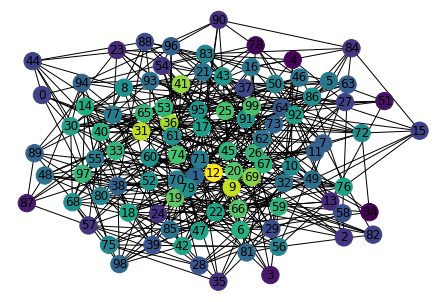

In [279]:
t = time.time()
moyennes = centraliteCloseness(G)
print("Temps d'execution (en s): ", end='')
print(time.time()-t)
print(moyennes)
nx.draw(G, node_color=moyennes,with_labels=True) # on affiche le graphe avec comme couleurs la centralite closeness

**Centralité Betweenness**

In [280]:
def centraliteBetweenness(G):
    Cb = dict((v,0) for v in G) # on initialise le dictionnaire des centralités pour chaque sommet a 0
    # Pour cette fonction j'utilise des dictionnaires plutôt que des listes car on peut mettre les sommets en index
    # et cela correspond mieux au pseudo-code que les listes.
    for s in G:
        S = [] # on utilisera S comme une pile
        P = dict((w,[]) for w in G) # contiendra le chemin entre les sommets
        o = dict((t,0) for t in G)
        o[s] = 1
        d = dict((t,-1) for t in G) # contiendra l'état de visite des sommets, etat : -1 signifie que le sommet n'a pas été visité
        d[s] = 0 # on marque notre premier sommet comme visité
        Q = [] # correspond à la file d'attente des sommets à visiter, on utilisera Q comme une file
        Q.append(s)
        while len(Q) > 0: # cette boucle correspond à un BFS, qui trouve TOUS les plus courts chemins entre le sommet et tous les autres.
            # On pourrait faire appel à ma fonction calculDistances, mais j'ai préféré suivre le pseudo-code.
            v = Q.pop(0) # on récupère le premier élément de la file
            S.append(v) # on l'ajoute à la liste des sommets
            for w in G.neighbors(v):
                if d[w] < 0: # permet de vérifier si le sommet n'a pas été visité
                    Q.append(w) # pas visité donc on l'ajoute à la file d'attente
                    d[w] = d[v] + 1 # on modifie sa valeur pour qu'il soit marqué comme visité
                if d[w] == d[v] + 1: # vérifie qu'on a visité ce sommet
                    o[w] += o[v] # calcul de la distance entre sommets
                    P[w].append(v) # on ajoute le chemin entre v et son voisin w
        delta = dict((v,0) for v in G) # contiendra 
        
        while len(S) > 0:
            w = S.pop() # S est une pile donc on récupère le dernier élément ajouté
            for v in P[w]: # on parcourt la liste des chemins pour chaque sommet du graphe
                delta[v] += (o[v]/o[w]) * (1+delta[w]) # on calcule la centralité pour chaque sommet du chemin
            if w != s: # vérifie que l'on n'est pas sur le sommet d'origine, car pas de boucle donc pas de chemin du sommet d'origine vers le sommet d'origine
                Cb[w] += delta[w] # la somme des centralités pour un sommet
    return Cb

Pour cet algorithme, je me suis inspiré du pseudo-code de l'algorithme de Brandes trouvé dans **U. Brandes. A Faster Algorithm for Betweenness Centrality, J. of Math. Sociology, Vol. 25, 2, pages 163-117.** (voir image ci-dessous) Le pseudo-code ressemble fortement à du python donc l'implémenatation est assez simple. Je n'utilise donc pas la formule donnée dans le sujet du projet mais cette formule-ci : 
$$CB(v) = \sum_{s∈G} δ(s|v)$$
Ce serait apparemment un algorithme plus rapide (d'après le titre du document) que celui donné dans l'énoncé. On ne retrouve pas les mêmes valeurs que si on utilisait la fonction **centrality_betweenness** de Networkx, mais les proportions sont les mêmes donc la coloration du graphe est identique.
Pour ce qui est de sa complexité, on retrouve une complexité qui est similaire à celle du parcours en largeur puisqu'elle est de **O(n+m)**. Cette complexité était donnée avec le pseudo-code, mais on la retrouve bien car nous avons deux boucles imbriquées, une qui parcourt les n sommets et l'autre qui visitera m arêtes en tout.

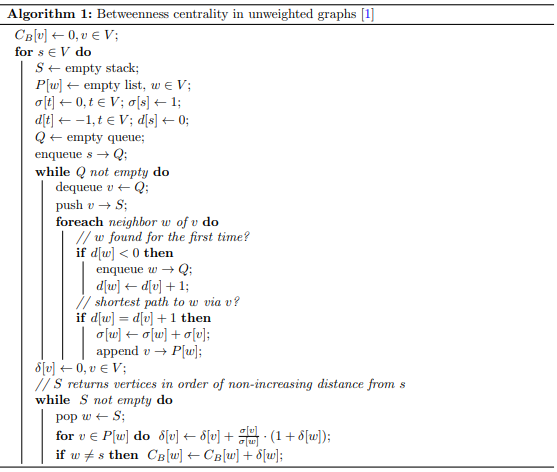

*Pseudo-code de l'agorithme de Brandes*

Temps d'execution (en s): 0.04436516761779785
{0: 49.61458735025163, 1: 62.1639524991692, 2: 32.65202069172657, 3: 15.759836035997028, 4: 41.09635796779761, 5: 90.64954665217823, 6: 161.4645237571539, 7: 79.11591790562379, 8: 134.69033350811853, 9: 329.96967348919156, 10: 190.32484143823152, 11: 83.14511986084541, 12: 342.834020694685, 13: 58.31813896457861, 14: 134.29981566421193, 15: 49.87945632798574, 16: 123.70775965184369, 17: 132.81426945947067, 18: 113.27179988913737, 19: 190.5844281587753, 20: 179.01021518900777, 21: 88.15136155217932, 22: 192.2781582620726, 23: 55.29953073242548, 24: 59.47944718680013, 25: 184.69691773654625, 26: 218.1185899411905, 27: 79.59653483771132, 28: 98.59198201441104, 29: 53.507457532147946, 30: 140.40638065924443, 31: 297.6929485804873, 32: 109.90923755392389, 33: 114.70703366980457, 34: 19.677785690401784, 35: 53.21765508313495, 36: 293.6748075965701, 37: 58.80464514845322, 38: 87.94041154064374, 39: 65.10135811041384, 40: 198.54268800178747, 41: 17

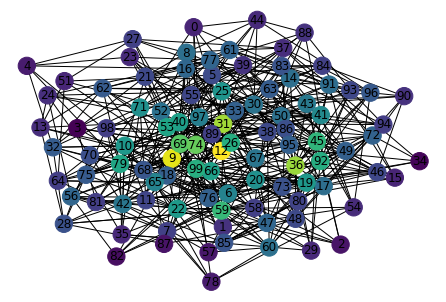

In [281]:
t = time.time()
C = centraliteBetweenness(G)
print("Temps d'execution (en s): ", end='')
print(time.time()-t)
print(C)
color = []
for c in C:
    color.append(C[c]) # on récupère la valeur de la centralité pour chaque sommet qu'on ajoute à l'array
nx.draw(G, node_color=color,with_labels=True)
mp.show()

**Centralité Expected Force**

In [282]:
def ensembleJ(G):
    J = dict((v,[]) for v in G)
    for u in G: # on parcourt tous les sommets du graphe
        for v in G.neighbors(u): # on parcourt les voisins du 1er sommet
            if u < v: # liste ordonnées, ici on créer la liste croissante
                for w in G.neighbors(v): # on parcourt les voisins du 2ème sommet
                    if v < w: # on s'assure que c'est croissant
                        x = [] # contiendra la liste des 2 sommets composant le chemin
                        x.append(v) # on ajoute le 2ème sommet
                        x.append(w) # on ajoute le 3ème sommet
                        J[u].append(x) # on enregistre les 2 sommets dans la liste à l'index du 1er sommet
            else: # on fait la même chose mais pour les listes décroissantes car J peut avoir les mêmes sommets si j sont ordonnées différemment
                for w in G.neighbors(v):
                    if v > w:
                        x = []
                        x.append(v)
                        x.append(w)
                        J[u].append(x)
    return J

def degreeJ(G,j):
    # pour calculer le degrée d'un groupe de sommets, on compte le nombre de voisins de chaque sommet de ce groupe
    # sans compter les sommets du groupe
    degree = 0
    for d in j: # on parcourt les 3 sommets de la liste
        for x in G.neighbors(d): # pour chaque sommet on regarde ses voisins
            if x not in j: # si le voisin n'est pas un membre de la liste, on augmente degree de 1
                degree+=1
    return degree

def degrees(G):
    # pour récupérer un dictionnaire de tous les degrées de chaque sommet dans J
    J = ensembleJ(G)
    degrees = dict((v,[]) for v in G)
    for x in J:
        for y in range(len(J[x])):
            j = J[x][y] # on crée la liste j qui contiendra les 3 sommets
            j.insert(0, x) # on ajoute le sommet i à la liste
            degree = degreeJ(G,j) # on calcule le degrée de j
            degrees[x].append(degree) # on l'ajoute à la liste
    return degrees

def degreeNormalisee(G):
    d = degrees(G)
    dTotal = 0
    degreeNorm = dict((v,[]) for v in G)
    # permet de faire la somme de tous les degrés de j dans J
    for i in d:
        dTotal += sum(d[i])
    dNorm = 0
    for u in G:
        for v in range(len(d[u])):
            dNorm = d[u][v]/dTotal # on divise les dj par la somme de tous les dj
            degreeNorm[u].append(dNorm)
    return degreeNorm

def centraliteExpectedForce(G):
    dNorm = degreeNormalisee(G)
    Ci = []    
    for i in G:
        somme = 0
        for j in range(len(dNorm[i])):
            somme += dNorm[i][j] * np.log(dNorm[i][j]) # on fait la somme des dj Normée multipliée par le log des dj Normée
        Ci.append(-somme) # ne pas oublier le - de la formule
    return Ci

Pour faire un programme plus lisible, et pour simplifier le calcul de la complexité j'ai divisé mon algorithme de **Centralité Expected Force** en plusieurs fonctions. Comme chaque fonction est appelée une seule fois au cours du programme, il faut calculer la complexité de chacun des algorithmes et la complexité la plus grande sera la complexité totale du programme. Je ne prendrais pas en comptes les conditions **if** dans mon calcul, car ce sont des conditions simples qui ont une complexité de **O(1)**. Aussi, l'ajout dans un dictionnaire ou une liste a une complexité de **O(1)**.

**- ensembleJ** : Nous avons 3 boucles imbriquées et pas 4 car la 3ème boucle est conditionnée par un if et à chaque passage seulement l'une des deux boucle ne s'effectuera, la première qui parcourera tous les sommets n et les deux autres qui parcoureront m arêtes en tout. Nous avons donc T(n) = n + m + m = n + 2m et cela donne une complexité de **O(n+m)**

**- degreeJ** : Nous avons 2 boucles imbriquées ainsi qu'un if. Comme dans certains algorithmes précédents, la première boucle parcourera tous les n sommets tandis que la deuxième n'ira que sur les sommets voisins au sommet actuel, donc on parcourera m arêtes en tout. Et cela revient à une complexité de **O(n+m)**

**- degrees** : Ici, nous parcourons simplement l'ensemble J qui a 2 dimensions : la première dimension contient les n sommets du graphe, tandis que la deuxième dimension correspond à m chemin(s) en tout. On a donc une complexité de **O(n+m)**

**- degreeNormalisee** : Nous avons une première boucle qui parcourt les n sommets du graphe, puis 2 boucles imbriquées qui sont similaires à celles de **degrees** et donc leurs complexité est **O(n+m)**. On a donc T(n) = n + (n+m). La complexité totale de cet algorithme est **O(n+m)**

**- centraliteExpectedForce :** : Encore une fois nous avons 2 boucles imbriquées qui suivent le même principe que celles de **degrees** et **degreeNormalisee** donc la complexité de cet algorithme est **O(n+m)**.

On trouve donc que la complexité totale pour la centralité expected force est : **O(n+m)**

Temps d'execution (en s): 0.02097177505493164
[0.07392841095192654, 0.08349805327285345, 0.07201265180172176, 0.05400824625278498, 0.0701900988166458, 0.08213759203231197, 0.1952542078649201, 0.09654474311314988, 0.12110291500493539, 0.15795259686997803, 0.13398510730924104, 0.07729571011062464, 0.21125343784861098, 0.05496414995466062, 0.15309136597399023, 0.04085700575448635, 0.09161899515829407, 0.10202859893470667, 0.10567918892100275, 0.08576132070150042, 0.1426398633106498, 0.048948862967255646, 0.07615130695392254, 0.0428093335075119, 0.05972222149847327, 0.10432473720057386, 0.09953727193186189, 0.03619146709739825, 0.057182668231648096, 0.06663704109350249, 0.10950291128120834, 0.09932595707953865, 0.0506576058556041, 0.0806225456711066, 0.02195109052464932, 0.017772332118337016, 0.17191295520226937, 0.03484209642119093, 0.05949453786778265, 0.04761252986171256, 0.08270987769692394, 0.13360186169704996, 0.07267461178545026, 0.08914215007557896, 0.03899697790974297, 0.085361242

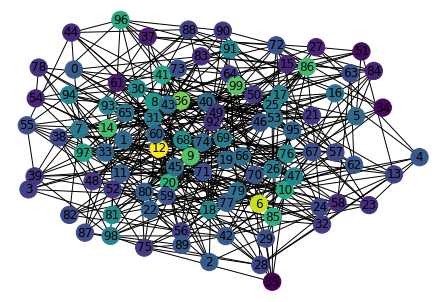

In [283]:
t = time.time()
d = centraliteExpectedForce(G)
print("Temps d'execution (en s): ", end='')
print(time.time()-t)
print(d)
nx.draw(G, node_color=d,with_labels=True)

**Pour aller plus loin**

Comparaison du temps d'exécution entre ma fonction qui calcule la centralité Closeness et celle de networkx.

In [284]:
t = time.time()
moyennes = centraliteCloseness(G)
print("Temps d'execution (en s): ", end='')
print(time.time()-t)

t = time.time()
moyennes = nx.closeness_centrality(G)
print("Temps d'execution (en s): ", end='')
print(time.time()-t)

Temps d'execution (en s): 0.07283258438110352
Temps d'execution (en s): 0.03150200843811035


Comparaison du temps d'exécution entre ma fonction qui calcule la centralité Betweenness et celle de networkx.

In [285]:
t = time.time()
C = centraliteBetweenness(G)
print("Temps d'execution (en s): ", end='')
print(time.time()-t)

t = time.time()
C = nx.betweenness_centrality(G)
print("Temps d'execution (en s): ", end='')
print(time.time()-t)

Temps d'execution (en s): 0.04388236999511719
Temps d'execution (en s): 0.03992128372192383


On peut voir que pour la centralité **Closeness** l'algorithme de Networkx est environ 2 fois plus rapide, la complexité de leur algorithme doit être **O(n) ou O(n+m)**. Mais pour l'algorithme de centralité **Betweennness** même si Networkx est encore une fois plus rapide, ma fonction est presque aussi rapide.